In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error , r2_score , explained_variance_score



In [7]:
cleaned_data = pd.read_csv("Chicago-Covid-SocioDemographics-Cases-Deaths.csv")


In [8]:
cleaned_data


,Zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Europe(%),Asia(%),Africa(%),Oceania(%),Latin America(%),North America(%),Death Counts,Death Counts(Per 1000),Case Counts,Case Counts(Per 1000)
0,60647,85658,32.2,17.56,75.14,7.30,49.75,50.25,48.50,4.72,...,14.76,14.11,1.67,0.68,66.31,2.47,184,2.15,17196,200.75
1,60639,88515,34.6,26.29,62.24,11.47,49.90,50.10,8.07,13.24,...,4.69,2.99,0.61,0.00,91.67,0.03,278,3.14,24130,272.61
2,60707,42434,40.0,21.06,63.60,15.33,47.33,52.67,46.85,6.63,...,42.45,11.93,0.98,0.00,44.29,0.34,130,3.06,4235,99.80
3,60622,52957,32.2,13.41,79.84,6.75,50.64,49.36,64.44,5.35,...,38.17,19.04,1.60,0.50,38.03,2.65,89,1.68,11074,209.11
4,60651,63679,33.9,26.37,61.38,12.25,46.37,53.63,5.00,53.02,...,1.55,2.46,0.89,0.00,94.89,0.21,182,2.86,14030,220.32
5,60611,33937,38.4,6.27,73.00,20.73,46.80,53.20,68.54,2.82,...,22.04,50.95,6.94,0.70,13.02,6.36,28,0.83,5623,165.69
6,60638,57057,38.3,24.19,62.31,13.50,50.95,49.05,42.33,3.43,...,28.35,2.37,0.92,0.03,68.33,0.00,164,2.87,14299,250.61
7,60652,42296,36.6,25.46,62.48,12.06,48.57,51.43,10.27,44.14,...,6.16,9.35,1.66,0.00,82.81,0.01,128,3.03,10108,238.98
8,60626,51017,34.3,17.17,73.22,9.61,48.36,51.64,45.25,26.39,...,17.61,19.88,28.47,0.32,32.51,1.21,191,3.74,8984,176.10
9,60615,41198,34.7,14.83,70.29,14.88,45.05,54.95,28.51,52.75,...,18.46,46.88,10.73,0.57,16.94,6.42,66,1.60,6197,150.42


In [9]:
zip_area = pd.read_csv("Chicago_area_by_zipcode.csv")

In [10]:
zip_area = zip_area.iloc[: , :-2]

zip_area

,zipcode,area
0,60007,14
1,60018,16
2,60068,7
3,60106,9
4,60131,6
...,...,...
62,60706,3
63,60707,4
64,60714,6
65,60804,8


In [11]:
merged_data = pd.merge(cleaned_data, zip_area, how='left', left_on='Zipcode', right_on='zipcode')

In [12]:
merged_data = merged_data.drop('zipcode', axis=1)

In [13]:
merged_data['area'] = merged_data['area'].replace(0,1)

In [ ]:
merged_data

In [15]:
merged_data['population_density'] = merged_data.apply (lambda row: (row['Population']/row['area']), axis=1)

In [16]:
merged_data

,Zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Africa(%),Oceania(%),Latin America(%),North America(%),Death Counts,Death Counts(Per 1000),Case Counts,Case Counts(Per 1000),area,population_density
0,60647,85658,32.2,17.56,75.14,7.30,49.75,50.25,48.50,4.72,...,1.67,0.68,66.31,2.47,184,2.15,17196,200.75,4,21414.500000
1,60639,88515,34.6,26.29,62.24,11.47,49.90,50.10,8.07,13.24,...,0.61,0.00,91.67,0.03,278,3.14,24130,272.61,5,17703.000000
2,60707,42434,40.0,21.06,63.60,15.33,47.33,52.67,46.85,6.63,...,0.98,0.00,44.29,0.34,130,3.06,4235,99.80,4,10608.500000
3,60622,52957,32.2,13.41,79.84,6.75,50.64,49.36,64.44,5.35,...,1.60,0.50,38.03,2.65,89,1.68,11074,209.11,2,26478.500000
4,60651,63679,33.9,26.37,61.38,12.25,46.37,53.63,5.00,53.02,...,0.89,0.00,94.89,0.21,182,2.86,14030,220.32,3,21226.333333
5,60611,33937,38.4,6.27,73.00,20.73,46.80,53.20,68.54,2.82,...,6.94,0.70,13.02,6.36,28,0.83,5623,165.69,1,33937.000000
6,60638,57057,38.3,24.19,62.31,13.50,50.95,49.05,42.33,3.43,...,0.92,0.03,68.33,0.00,164,2.87,14299,250.61,11,5187.000000
7,60652,42296,36.6,25.46,62.48,12.06,48.57,51.43,10.27,44.14,...,1.66,0.00,82.81,0.01,128,3.03,10108,238.98,5,8459.200000
8,60626,51017,34.3,17.17,73.22,9.61,48.36,51.64,45.25,26.39,...,28.47,0.32,32.51,1.21,191,3.74,8984,176.10,2,25508.500000
9,60615,41198,34.7,14.83,70.29,14.88,45.05,54.95,28.51,52.75,...,10.73,0.57,16.94,6.42,66,1.60,6197,150.42,2,20599.000000


In [17]:
merged_data['population_density'] = merged_data['population_density'].round(1)

In [18]:
merged_data.to_csv('Chicago-Covid-SocioDemographics-Pop_density.csv', index=False)

In [19]:
merged_data

,Zipcode,Population,Median age,Under 18(%),18 to 64(%),65 and over(%),Male(%),Female(%),White(%),Black(%),...,Africa(%),Oceania(%),Latin America(%),North America(%),Death Counts,Death Counts(Per 1000),Case Counts,Case Counts(Per 1000),area,population_density
0,60647,85658,32.2,17.56,75.14,7.30,49.75,50.25,48.50,4.72,...,1.67,0.68,66.31,2.47,184,2.15,17196,200.75,4,21414.5
1,60639,88515,34.6,26.29,62.24,11.47,49.90,50.10,8.07,13.24,...,0.61,0.00,91.67,0.03,278,3.14,24130,272.61,5,17703.0
2,60707,42434,40.0,21.06,63.60,15.33,47.33,52.67,46.85,6.63,...,0.98,0.00,44.29,0.34,130,3.06,4235,99.80,4,10608.5
3,60622,52957,32.2,13.41,79.84,6.75,50.64,49.36,64.44,5.35,...,1.60,0.50,38.03,2.65,89,1.68,11074,209.11,2,26478.5
4,60651,63679,33.9,26.37,61.38,12.25,46.37,53.63,5.00,53.02,...,0.89,0.00,94.89,0.21,182,2.86,14030,220.32,3,21226.3
5,60611,33937,38.4,6.27,73.00,20.73,46.80,53.20,68.54,2.82,...,6.94,0.70,13.02,6.36,28,0.83,5623,165.69,1,33937.0
6,60638,57057,38.3,24.19,62.31,13.50,50.95,49.05,42.33,3.43,...,0.92,0.03,68.33,0.00,164,2.87,14299,250.61,11,5187.0
7,60652,42296,36.6,25.46,62.48,12.06,48.57,51.43,10.27,44.14,...,1.66,0.00,82.81,0.01,128,3.03,10108,238.98,5,8459.2
8,60626,51017,34.3,17.17,73.22,9.61,48.36,51.64,45.25,26.39,...,28.47,0.32,32.51,1.21,191,3.74,8984,176.10,2,25508.5
9,60615,41198,34.7,14.83,70.29,14.88,45.05,54.95,28.51,52.75,...,10.73,0.57,16.94,6.42,66,1.60,6197,150.42,2,20599.0


In [20]:
merged_data.columns

Index(['Zipcode', 'Population', 'Median age', 'Under 18(%)', '18 to 64(%)',
       '65 and over(%)', 'Male(%)', 'Female(%)', 'White(%)', 'Black(%)',
       'Native(%)', 'Asian(%)', 'Islander(%)', 'Two plus(%)', 'Hispanic(%)',
       'Per capita income (USD)', 'Median household income (USD)',
       'Below poverty line(%)', 'Mean travel time to work (Minutes)',
       'Drove Alone (%)', 'Carpooled (%)', 'Public Transit (%)', 'Bicycle (%)',
       'Walked (%)', 'Other (%)', 'Worked at home (%)', 'Number of households',
       'Persons per household', 'Married (%)', 'Single (%)',
       'Number of housing units', 'Occupied housing (%)', 'Vacant housing (%)',
       'Owner Occupied (%)', 'Renter Occupied (%)', 'Median housing value',
       'Moved Since Prev Year(%)', 'Same House Prev Year(%)', 'No Degree(%)',
       'High School(%)', 'Some College(%)', 'Bachelor's(%)', 'Post-grad(%)',
       'Foriegn Born Population(%)', 'Europe(%)', 'Asia(%)', 'Africa(%)',
       'Oceania(%)', 'Latin Ame

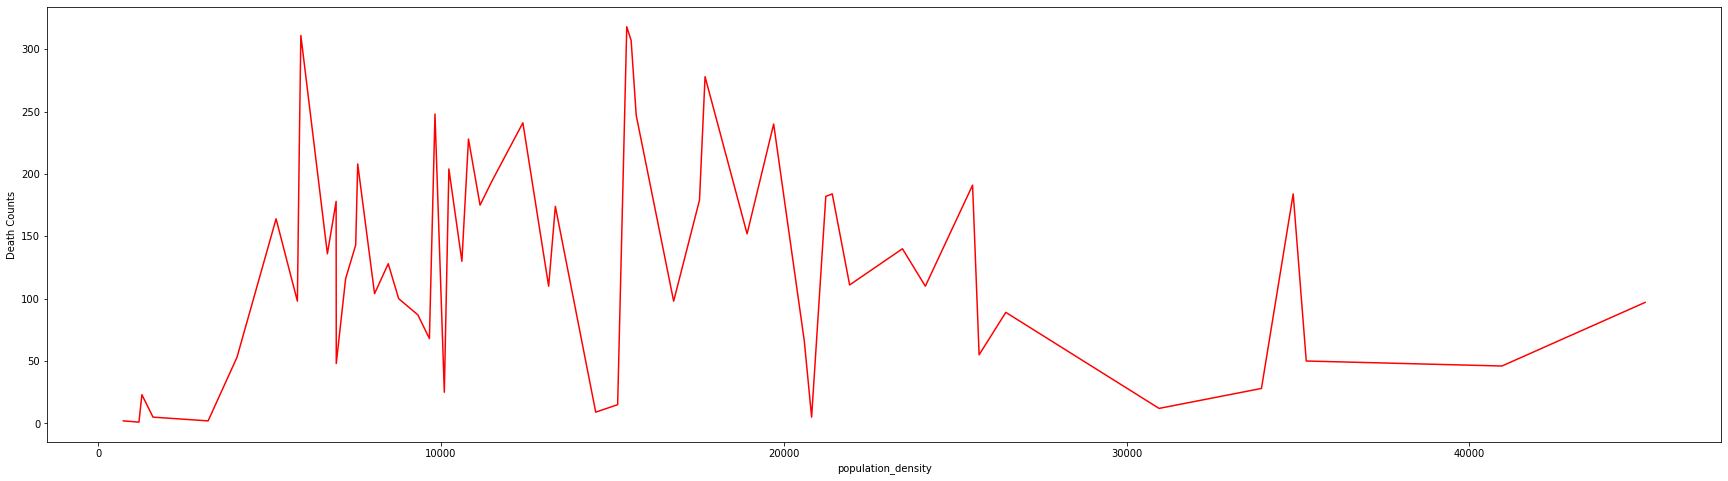

In [21]:
plt.figure(figsize=(30,8))
sns.lineplot(data=merged_data, x="population_density", y="Death Counts", color='r')

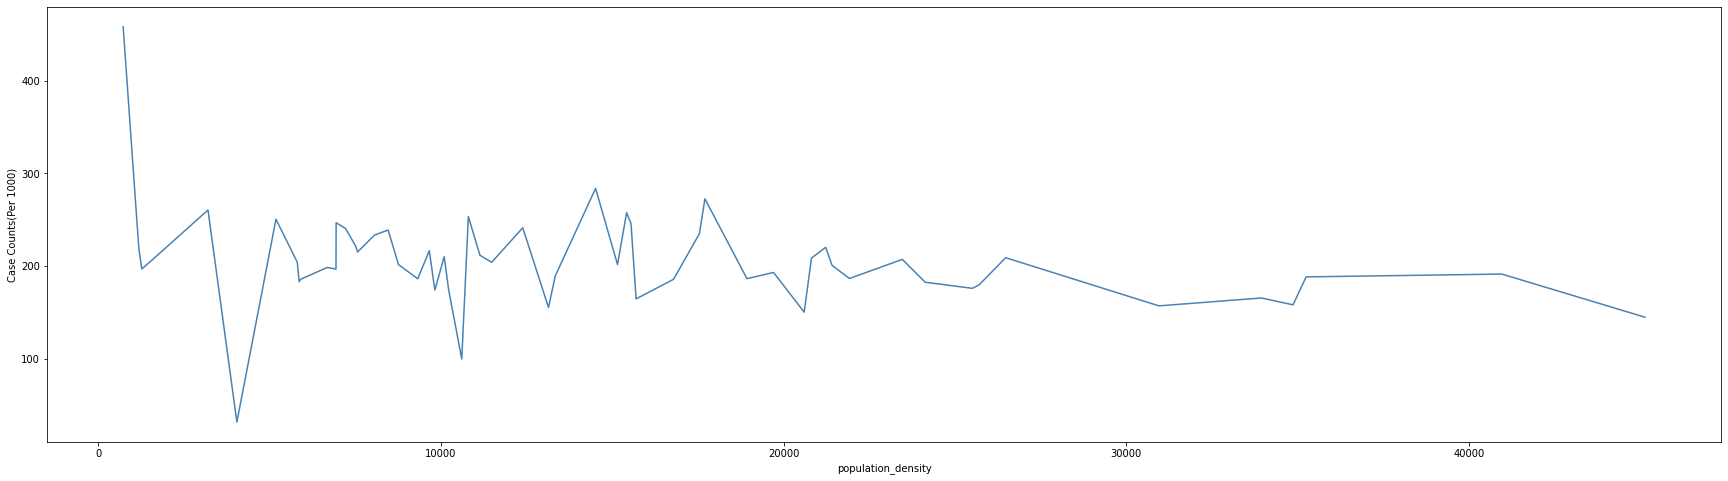

In [22]:
plt.figure(figsize=(30,8))
sns.lineplot(data=merged_data, x="population_density", y="Case Counts(Per 1000)", color='steelblue')

In [119]:
cleaned_data.columns


Index(['Zipcode', 'Population', 'Median age', 'Under 18(%)', '18 to 64(%)',
       '65 and over(%)', 'Male(%)', 'Female(%)', 'White(%)', 'Black(%)',
       'Native(%)', 'Asian(%)', 'Islander(%)', 'Two plus(%)', 'Hispanic(%)',
       'Per capita income (USD)', 'Median household income (USD)',
       'Below poverty line(%)', 'Mean travel time to work (Minutes)',
       'Drove Alone (%)', 'Carpooled (%)', 'Public Transit (%)', 'Bicycle (%)',
       'Walked (%)', 'Other (%)', 'Worked at home (%)', 'Number of households',
       'Persons per household', 'Married (%)', 'Single (%)',
       'Number of housing units', 'Occupied housing (%)', 'Vacant housing (%)',
       'Owner Occupied (%)', 'Renter Occupied (%)', 'Median housing value',
       'Moved Since Prev Year(%)', 'Same House Prev Year(%)', 'No Degree(%)',
       'High School(%)', 'Some College(%)', 'Bachelor's(%)', 'Post-grad(%)',
       'Foriegn Born Population(%)', 'Europe(%)', 'Asia(%)', 'Africa(%)',
       'Oceania(%)', 'Latin Ame

In [163]:
features = [ 'Population', 'Median age', 'Under 18(%)', '18 to 64(%)',
       '65 and over(%)', 'Male(%)', 'Female(%)', 'White(%)', 'Black(%)',
       'Native(%)', 'Asian(%)', 'Islander(%)', 'Two plus(%)', 'Hispanic(%)',
       'Per capita income (USD)', 'Median household income (USD)',
       'Below poverty line(%)', 'Mean travel time to work (Minutes)',
       'Drove Alone (%)', 'Carpooled (%)', 'Public Transit (%)', 'Bicycle (%)',
       'Walked (%)', 'Other (%)', 'Worked at home (%)', 'Number of households',
       'Persons per household', 'Married (%)', 'Single (%)',
       'Number of housing units', 'Occupied housing (%)', 'Vacant housing (%)',
       'Owner Occupied (%)', 'Renter Occupied (%)', 'Median housing value',
       'Moved Since Prev Year(%)', 'Same House Prev Year(%)', 'No Degree(%)',
       'High School(%)', 'Some College(%)', "Bachelor's(%)", 'Post-grad(%)',
       'Foriegn Born Population(%)', 'Europe(%)', 'Asia(%)', 'Africa(%)',
       'Oceania(%)', 'Latin America(%)', 'North America(%)', 'Death Counts',
       'Death Counts(Per 1000)', 'Case Counts']

In [164]:
X = merged_data[features]


In [165]:
X.shape

(57, 52)

In [166]:
y = merged_data['Case Counts(Per 1000)']


In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.43, random_state=42)

In [168]:
model = LinearRegression()

In [169]:
model.fit(X, y)
# get importance
importance = model.coef_

In [170]:
importance
# features = merged_data.corr()

array([-3.83978280e-03, -6.93566788e+00,  1.58034455e+03,  1.58045215e+03,
        1.58291536e+03,  3.74682252e-01, -3.74682390e-01,  3.89873550e+01,
        3.76631765e+01,  2.82546225e+01,  3.76854679e+01,  1.79081258e+02,
        1.65963621e+01,  3.44680802e+01, -2.55010855e-03, -6.11232976e-04,
       -7.70887634e+00,  9.76518492e-01,  1.38297313e+01,  1.19623463e+01,
        1.37702937e+01,  1.80314225e+01,  2.08624823e+01, -3.17064478e+00,
        1.74415012e+01, -1.18697217e-02, -7.42755870e+01, -1.06494688e+00,
        1.06494689e+00,  1.04115365e-02,  1.19522308e+00, -1.19522308e+00,
       -6.65496071e-01,  6.65496090e-01,  2.75413795e-04, -5.21727905e+00,
        5.21727905e+00, -2.07325808e+03, -2.07580983e+03, -2.07085634e+03,
       -2.07384075e+03, -2.07642925e+03,  1.96636063e+00, -2.19019456e+03,
       -2.18794571e+03, -2.18953248e+03, -2.17185520e+03, -2.18751304e+03,
       -2.18180165e+03, -4.91948411e-01,  2.84176692e+01,  2.53180953e-02])

In [171]:
features_new = list()
for i,v in enumerate(importance):
	print('%s: Score: %.1f' % (features[i],v))
	if v > 10:
			features_new.append(features[i])

print(features_new)

    

Population: Score: -0.0
Median age: Score: -6.9
Under 18(%): Score: 1580.3
18 to 64(%): Score: 1580.5
65 and over(%): Score: 1582.9
Male(%): Score: 0.4
Female(%): Score: -0.4
White(%): Score: 39.0
Black(%): Score: 37.7
Native(%): Score: 28.3
Asian(%): Score: 37.7
Islander(%): Score: 179.1
Two plus(%): Score: 16.6
Hispanic(%): Score: 34.5
Per capita income (USD): Score: -0.0
Median household income (USD): Score: -0.0
Below poverty line(%): Score: -7.7
Mean travel time to work (Minutes): Score: 1.0
Drove Alone (%): Score: 13.8
Carpooled (%): Score: 12.0
Public Transit (%): Score: 13.8
Bicycle (%): Score: 18.0
Walked (%): Score: 20.9
Other (%): Score: -3.2
Worked at home (%): Score: 17.4
Number of households: Score: -0.0
Persons per household: Score: -74.3
Married (%): Score: -1.1
Single (%): Score: 1.1
Number of housing units: Score: 0.0
Occupied housing (%): Score: 1.2
Vacant housing (%): Score: -1.2
Owner Occupied (%): Score: -0.7
Renter Occupied (%): Score: 0.7
Median housing value: S

In [183]:
X = merged_data[features_new]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)
scores_regr = mean_squared_error(y_test, y_pred)
print(scores_regr)

6558.848476402532


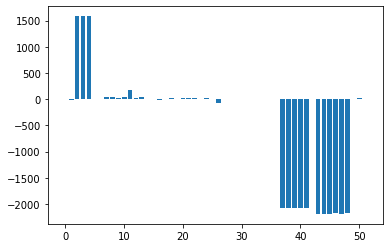

In [180]:
from matplotlib import pyplot
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [184]:
y_pred = model.predict(X_test)
model.score(X_test,y_test)

-0.11199962452823042

In [185]:

# random forest for feature importance on a regression problem

X = merged_data[features]
y = merged_data['Case Counts(Per 1000)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.73, random_state=42)
features_random_forest = list()
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('%s: Score: %.1f' % (features[i],v*100))
	if v*100 > 1:
		features_random_forest.append(features[i])

X = merged_data[features_random_forest]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.73, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Explained Variance Score ", explained_variance_score(y_test, y_pred))
scores_regr = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", scores_regr)


Population: Score: 0.7
Median age: Score: 1.1
Under 18(%): Score: 0.4
18 to 64(%): Score: 1.0
65 and over(%): Score: 0.4
Male(%): Score: 0.1
Female(%): Score: 0.6
White(%): Score: 0.4
Black(%): Score: 1.8
Native(%): Score: 1.1
Asian(%): Score: 0.3
Islander(%): Score: 0.1
Two plus(%): Score: 0.9
Hispanic(%): Score: 2.4
Per capita income (USD): Score: 0.6
Median household income (USD): Score: 4.2
Below poverty line(%): Score: 7.4
Mean travel time to work (Minutes): Score: 2.7
Drove Alone (%): Score: 0.2
Carpooled (%): Score: 0.8
Public Transit (%): Score: 12.7
Bicycle (%): Score: 0.1
Walked (%): Score: 0.3
Other (%): Score: 1.8
Worked at home (%): Score: 1.5
Number of households: Score: 1.6
Persons per household: Score: 0.8
Married (%): Score: 1.6
Single (%): Score: 0.4
Number of housing units: Score: 3.8
Occupied housing (%): Score: 0.3
Vacant housing (%): Score: 1.9
Owner Occupied (%): Score: 1.7
Renter Occupied (%): Score: 0.7
Median housing value: Score: 2.1
Moved Since Prev Year(%):

In [160]:
!pip install xgboost

In [161]:
import xgboost
print(xgboost.__version__)

0.90


[23:52:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Population: Score: 0.057
Median age: Score: 0.001
Under 18(%): Score: 0.277
18 to 64(%): Score: 0.043
65 and over(%): Score: 0.010
Male(%): Score: 0.016
Female(%): Score: 0.000
White(%): Score: 0.001
Black(%): Score: 0.021
Native(%): Score: 0.033
Asian(%): Score: 0.016
Islander(%): Score: 0.000
Two plus(%): Score: 0.001
Hispanic(%): Score: 0.019
Per capita income (USD): Score: 0.000
Median household income (USD): Score: 0.014
Below poverty line(%): Score: 0.001
Mean travel time to work (Minutes): Score: 0.000
Drove Alone (%): Score: 0.024
Carpooled (%): Score: 0.041
Public Transit (%): Score: 0.033
Bicycle (%): Score: 0.013
Walked (%): Score: 0.005
Other (%): Score: 0.010
Worked at home (%): Score: 0.007
Number of households: Score: 0.025
Persons per household: Score: 0.065
Married (%): Score: 0.001
Single (%): Score: 0.000
Number of housing units: Score: 0.002

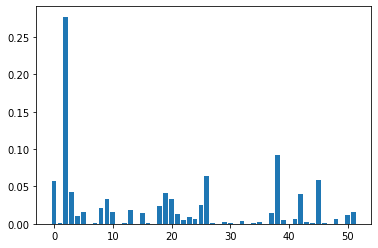

In [187]:
X = merged_data[features]
y = merged_data['Case Counts(Per 1000)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)
features_xgb = list()
model = XGBRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('%s: Score: %.3f' % (features[i],v))
	if v > 0.02 :
		features_xgb.append(features[i])
	
print(features_xgb)
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [191]:
X = merged_data[features_xgb]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Explained Variance Score ", explained_variance_score(y_test, y_pred))
scores_regr = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", scores_regr)

[23:54:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Explained Variance Score  0.03766496144698073
Mean Squared Error:  2523.8362313900043
